 # Exercice 1 : SVM à marge douce 

### Objectifs

- Comprendre le rôle des variables de slack $\xi\$ dans les SVM.
- Manipuler le paramètre \(C\) pour ajuster la tolérance aux erreurs de classification.
- Appliquer un SVM à un jeu de données non linéairement séparable et analyser les résultats.


## Données synthétiques

On s'intéresse ici au cas de données presque linéairement séparable. Et on cherche à résoudre le problème du SVM correspondant

In [31]:
import matplotlib.pyplot as plt
import numpy as np
import cvxpy as cp

In [32]:
def generate_nearly_separable_data(num_points_per_class=8, seed=None, noise_level=0.3):
    """
    Génère des données presque linéairement séparables en ajoutant du bruit autour de la frontière de décision.
    
    Parameters:
    - num_points_per_class: int, nombre de points par classe.
    - seed: int, valeur pour initialiser le générateur aléatoire (pour reproductibilité).
    - noise_level: float, niveau de bruit ajouté pour rendre les données presque linéairement séparables.
    
    Returns:
    - X: numpy.ndarray, coordonnées des points (2D).
    - y: numpy.ndarray, classes des points (+1 ou -1).
    """
    if seed is not None:
        np.random.seed(seed)
    
    # Génération des points pour la classe +1 (séparée)
    class1 = np.random.multivariate_normal(mean=[-2, -2], cov=[[1, 0.5], [0.5, 1]], size=num_points_per_class)
    
    # Génération des points pour la classe -1 (séparée)
    class2 = np.random.multivariate_normal(mean=[2, 2], cov=[[1, -0.3], [-0.3, 1]], size=num_points_per_class)
    
    # Combinaison des deux classes
    X = np.vstack((class1, class2))
    y = np.hstack((np.ones(num_points_per_class), -np.ones(num_points_per_class)))
    
    # Ajout de bruit pour rendre les données presque linéairement séparables
    noise = np.random.randn(X.shape[0], X.shape[1]) * noise_level
    X += noise
    
    return X, y




def plot_points(X, y):
    """
    Affiche les points de données avec différentes couleurs pour chaque classe.

    Parameters:
    - X: numpy.ndarray, les données avec les caractéristiques (n_samples, n_features).
    - y: numpy.ndarray, les étiquettes des classes associées aux données (n_samples).
    """
    unique_classes = np.unique(y)  # Trouve toutes les classes uniques


    # Tracer les points de chaque classe
    for i, label in enumerate(unique_classes):
        plt.scatter(X[y == label][:, 0], X[y == label][:, 1], label=f'Classe {label}')

    # Ajouter une légende et un titre
    plt.legend()
    plt.title("Données avec classes multiples")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.grid(True)
    #plt.show()



def plot_decision_boundary_with_margins(w, b, X,y, X_range=(-5, 5), Y_range=(-5, 5), title="Frontière de décision et marges SVM"):
    """
    Affiche la frontière de décision et les marges d'un SVM linéaire.

    Parameters:
    - w: numpy.ndarray, vecteur des poids appris.
    - b: float, biais appris.
    - X_range: tuple, plage des valeurs pour l'axe x (min, max).
    - Y_range: tuple, plage des valeurs pour l'axe y (min, max).
    - title: str, titre du graphique.
    """
    plt.figure(figsize=(8, 6))
    plot_points(X, y)

    # Plage de valeurs x pour afficher la frontière et les marges
    x1 = np.linspace(X_range[0], X_range[1], 100)
    
    # Calcul de x2 pour les trois lignes : frontière, marge positive et marge négative
    decision_boundary = -(w[0] * x1 + b) / w[1]  # Frontière de décision
    margin_positive = -(w[0] * x1 + b-1) / w[1] # Marge positive
    margin_negative = -(w[0] * x1 + b+1 ) / w[1] # Marge négative

    # Tracer les trois lignes
    plt.plot(x1, decision_boundary, color='green', label='Frontière de décision')
    plt.plot(x1, margin_positive, '--', color='m', label='Marge positive')
    plt.plot(x1, margin_negative, '--', color='m', label='Marge négative')

    # Définir les limites du graphique
    plt.xlim(X_range)
    plt.ylim(Y_range)
    
    # Ajouter des labels et une légende
    plt.title(title)
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.legend()
    plt.grid(True)
    plt.show()





**Question**: Test de la fonction

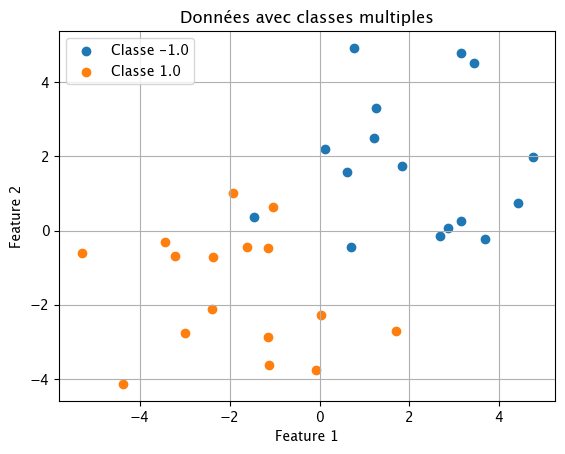

In [33]:
X, y = generate_nearly_separable_data(num_points_per_class=16, seed=42, noise_level=1.5)
plot_points(X,y)

**Question** : En vous inspirant de la première partie, complèter la fonction suivant

In [34]:
import numpy as np
import matplotlib.pyplot as plt
import cvxpy as cp

In [35]:
def solve_svm2(X, y, C=1.0):
    n, f = X.shape
    w = cp.Variable(f)
    b = cp.Variable()
    slack = cp.Variable(n)
    
    objective = cp.Minimize(0.5*cp.norm2(w)**2 + C*sum(slack))
    constraints = []
    for i in range(n):
        constraint = y[i]*(X[i]@w + b) + slack[i]  >= 1
        constraints.append(constraint)
        constraints.append(slack[i] >= 0)
    
    problem = cp.Problem(objective, constraints)
    problem.solve()
    
    return w.value, b.value


**Question** :  Fonction pour tester différentes valeurs de C

In [36]:

def test_svm_with_different_C(X, y,C_values=[0.01, 0.1, 3, 10, 100.0]):
    for C in C_values:
        print(f"Résolution pour C = {C}")
        
        # Résolution du problème SVM
        w, b = solve_svm2(X, y, C)
 
        
        # Affichage de la frontière de décision et des marges
        plot_decision_boundary_with_margins(w, b, X,y, X_range=(-5, 5), Y_range=(-5, 5), title="Frontière de décision et marges SVM")

# Génération de données de test

X, y = generate_nearly_separable_data(num_points_per_class=16, seed=42, noise_level=1.5)


# Tester avec différentes valeurs de 

Résolution pour C = 0.01


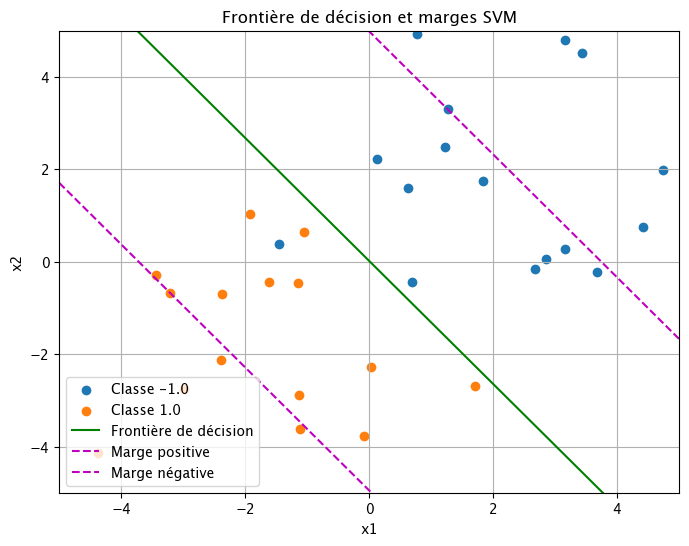

Résolution pour C = 0.1


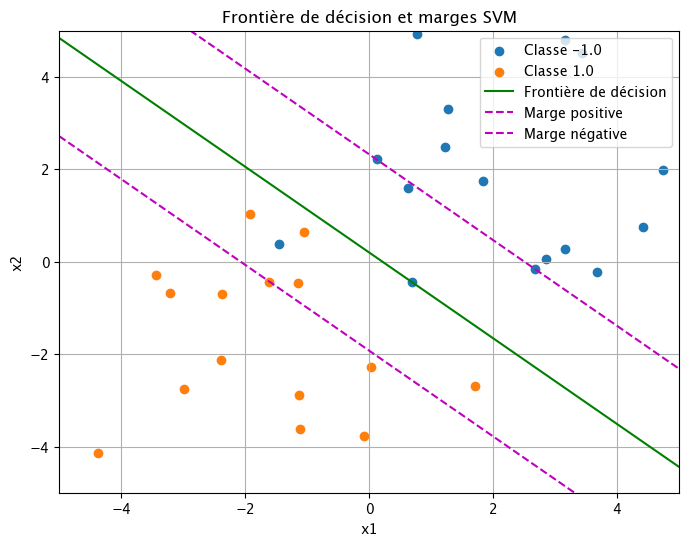

Résolution pour C = 3


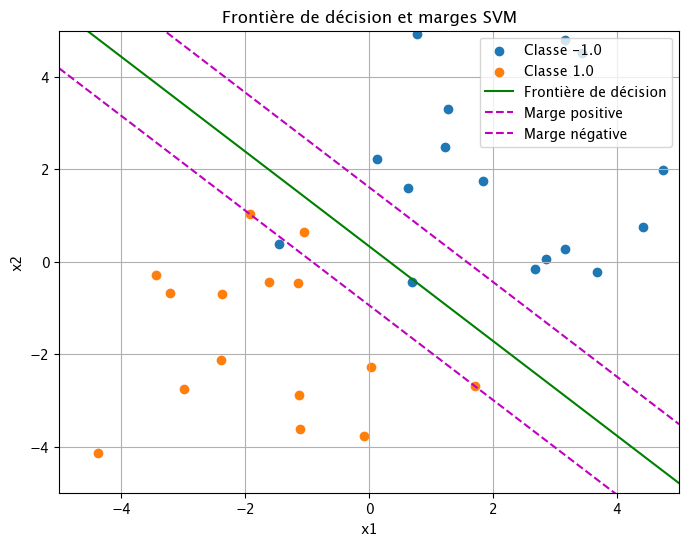

Résolution pour C = 10


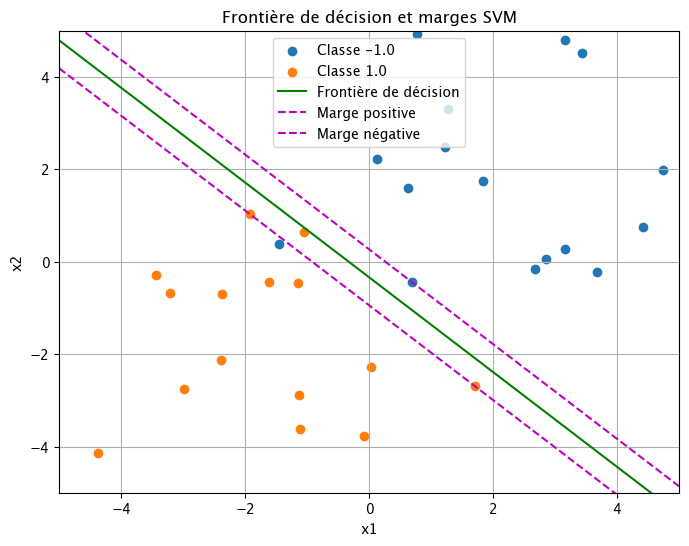

Résolution pour C = 100.0


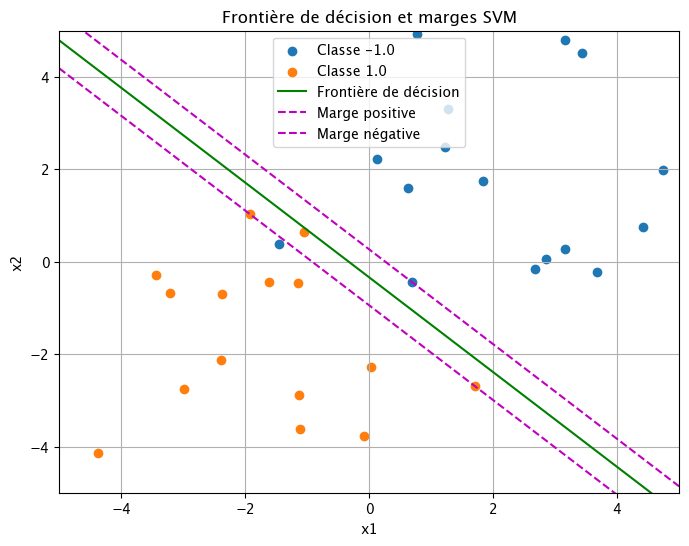

In [37]:
test_svm_with_different_C(X, y)


**Question** : Que se passe t-il quand $C = 0.001 ?$

**Question** : Que se passe t-il quand $C =100 ?$

Plus C est grand, plus les marges sont proche de l'hyperplan

## Données réelles

In [38]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np

## Données iris

Le jeu de données Iris est un ensemble classique en apprentissage automatique introduit par Ronald A. Fisher en 1936. Il comprend 150 échantillons de fleurs répartis en trois espèces (Iris setosa, Iris versicolor, Iris virginica), avec quatre caractéristiques : longueur et largeur du sépale, longueur et largeur du pétale (en cm). Utilisé principalement pour des tâches de classification, ce jeu de données est apprécié pour sa simplicité, sa taille réduite, et la diversité des classes, certaines étant facilement séparables (Iris setosa), tandis que d'autres (Iris versicolor et Iris virginica) sont plus proches.

**Questions**
1. Charger le dataset Iris
2. Garder les deux premières caractéristiques pour la visualisation
3. Filtrer pour conserver seulement deux classes (e.g., setosa et versicolor)
4. Séparer les données en train et test
5. Visusaliser les données

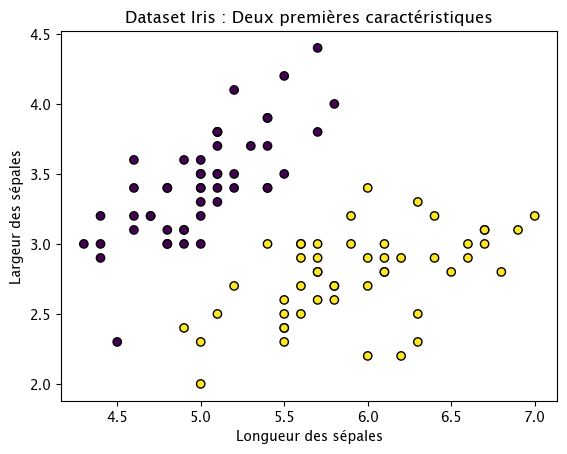

In [39]:
# Charger le dataset Iris
iris = load_iris()
X_iris = iris.data[:, :2]  # Garder les deux premières caractéristiques pour la visualisation
y_iris = iris.target

# Filtrer pour conserver seulement deux classes (e.g., setosa et versicolor)
mask = y_iris < 2
X_iris= X_iris[mask]
y_iris = y_iris [mask]

# Séparer les données en train et test
X_train, X_test, y_train, y_test = train_test_split(X_iris, y_iris , test_size=0.3, random_state=42)

# Visualisation des données
plt.scatter(X_iris[:, 0], X_iris[:, 1], c=y_iris , cmap='viridis', edgecolors='k')
plt.xlabel('Longueur des sépales')
plt.ylabel('Largeur des sépales')
plt.title('Dataset Iris : Deux premières caractéristiques')
plt.show()


## Utilisation de  l'algorithme de sklearn sur les données Iris

In [40]:
from sklearn.metrics import accuracy_score

On utilisera la fonction ci-dessous pour afficher la frontière de décision ainsi que les marges

In [41]:

def plot_decision_boundary_iris(model, X, y, title="Frontière de décision et marges SVM"):
    """
    Trace la frontière de décision et les marges pour un SVM linéaire.

    Parameters:
    - model: SVM entraîné (scikit-learn SVC avec kernel='linear').
    - X: numpy.ndarray, données d'entrée (n_samples, n_features).
    - y: numpy.ndarray, étiquettes des classes (n_samples,).
    - title: str, titre du graphique.
    """
    plt.figure(figsize=(8, 6))
    
    # Tracer les points des deux classes
    unique_classes = np.unique(y)
    colors = ['r', 'b']
    for i, cls in enumerate(unique_classes):
        plt.scatter(
            X[y == cls, 0], X[y == cls, 1],
            label=f"Classe {cls}", color=colors[i], edgecolor='k'
        )

    # Récupérer les limites des axes
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

    # Générer un maillage pour calculer la frontière
    xx, yy = np.meshgrid(
        np.linspace(x_min, x_max, 100),
        np.linspace(y_min, y_max, 100)
    )
    Z = model.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Tracer la frontière de décision et les marges
    plt.contour(xx, yy, Z, levels=[-1, 0, 1], linestyles=['--', '-', '--'], colors='k')
    plt.title(title)
    plt.xlabel('Caractéristique 1')
    plt.ylabel('Caractéristique 2')
    plt.legend()
    plt.grid(True)
    plt.show()


La fonction $\texttt{accuracy\_score}$ de $\texttt{sklearn.metrics}$ calcule l'exactitude $(\textit{accuracy})$ d'un modèle de classification.

L'exactitude est définie comme le rapport entre le nombre de prédictions correctes et le nombre total de prédictions effectuées. Elle est donnée par la formule suivante :

$$
\text{Accuracy} = \frac{\text{Nombre de prédictions correctes}}{\text{Nombre total d'échantillons}}
$$


1. Entraîner un SVM avec un noyau linéaire

In [42]:
#import de la classe - qui s'appelle SVC et pas SVM...
from sklearn.svm import SVC
#Définition du modèle
model = SVC(kernel='linear', C=1)
#Apprentissage sur les donnée
model.fit(X_train, y_train)


SVC(C=1, kernel='linear')

2. Tracer la frontière de décision et les marges

In [43]:
import numpy as np

def affiche_fonction_de_decision(model, ax=None, plot_support=True):
    """Affiche le séparateur, les marges, et les vecteurs de support d'un SVM en 2D"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # création de la grille pour l'évaluation
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    # affichage de l'hyperplan et des marges
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    
    # Affichage des vecteurs de support
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none', edgecolor='black');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

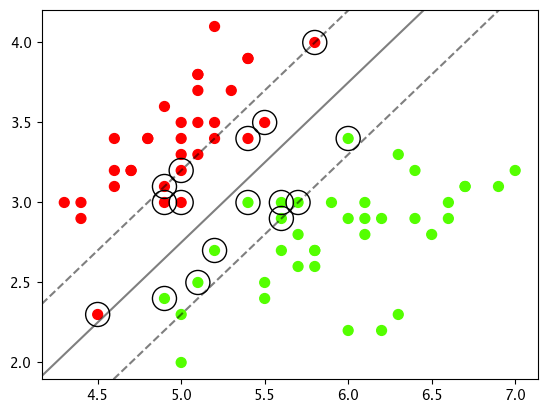

In [44]:
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, s=50, cmap='prism')
affiche_fonction_de_decision(model);

3. Faire la prédiction sur les donées de test

In [45]:
y_predict = model.predict(X_test)
y_predict



array([1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 1])

4. Calculer et afficher le score d'exactitude

In [46]:
accuracy_score( y_predict, y_test)

1.0

# SVM non linéairement séparable

Nous allosn reprendre la classification sur les données iris mais avec un noyau Gaussien

In [47]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets
from sklearn.model_selection import train_test_split

# Chargement des données
iris = datasets.load_iris()
X, y = iris.data, iris.target
# On conserve 50% du jeu de données pour l'évaluation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)

Testez l’effet du paramètre d’échelle du noyau (gamma) et du paramètre de régularisation C.

In [48]:
clf = svm.SVC(C=1.0, kernel='rbf', gamma=0.25)
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.96

afficher la frontière de décision

In [49]:
X, y = iris.data[:,:2], iris.target
# On conserve 50% du jeu de données pour l'évaluation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)

Text(0.5, 1.0, 'SVM RBF')

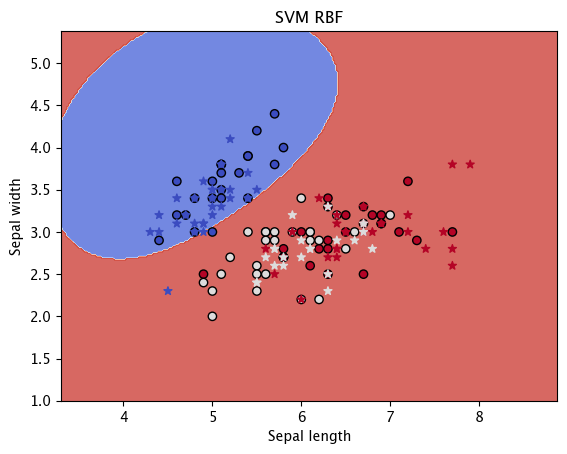

In [50]:
clf = svm.SVC(C=0.1, kernel='rbf', gamma=0.5)
clf.fit(X_train, y_train)

# Pour afficher la surface de décision on va discrétiser l'espace avec un pas h
h = .02
# Créer la surface de décision discretisée
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Surface de décision
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
# Afficher aussi les points d'apprentissage
plt.scatter(X_train[:, 0], X_train[:, 1], label="train", edgecolors='k', c=y_train, cmap=plt.cm.coolwarm)
plt.scatter(X_test[:, 0], X_test[:, 1], label="test", marker='*', c=y_test, cmap=plt.cm.coolwarm)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.title("SVM RBF")

Que constatez vous ?

L’utilisation du noyau gaussien permet d’obtenir des frontières de décision non linéaires. Le paramètre gamma correspond au rayon d’influence de chaque observation : plus 
γ
γ est élevé, plus le rayon d’influence de chaque observation est réduit. Les observations plus proches de la frontière ont donc plus de poids et la frontière aura tendance à « coller » aux observations.

# TP à rendre

Reproduisez pour les datasets suivants...
 - [Digits](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html#sklearn.datasets.load_digits) (en utilisant les données complètes)
 
 - [Iris](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html#sklearn.datasets.load_iris)

... les expérimentations suivantes 

- Mise au point de deux types des classifieurs : Arbre de décision et SVM. Pour chacun de ces types de classifieurs vous devrez :
 - Définir les hyper-paramètres à faire varier.
 - Evaluer et selectionner par Grid-Search l'ensemble des configurations possibles, en utilisant la Validation Croisée à 3 plis pour l'évaluation de la performance en généralisation. Vous pourrez vous inspirer d'un code tel que [celui-ci](http://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html#sphx-glr-auto-examples-classification-plot-classifier-comparison-py) pour boucler sur les datasets et/ou les classifieurs.
- Ecrire sous forme d'un tableau récapitulatif les performances respectives (les meilleures obtenues) par chacun des modèles sur chacun des jeux de données (sur le test set).
- Donner des conclusions sur les résultats obtenus quand à la performance, la stabilité, la robustesse des familles de classifieurs utilisées, et les paramètres optimaux de chaque type de modèle.

In [51]:
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt
from graphviz import Source
from IPython.display import SVG

Arbre de décision

Exactitude du meilleur arbre : 0.8888888888888888
              precision    recall  f1-score   support

           0       0.94      0.94      0.94        33
           1       0.93      0.93      0.93        28
           2       0.90      0.79      0.84        33
           3       0.91      0.85      0.88        34
           4       0.80      0.87      0.83        46
           5       0.96      0.96      0.96        47
           6       0.91      0.91      0.91        35
           7       0.83      0.88      0.86        34
           8       0.86      0.83      0.85        30
           9       0.88      0.90      0.89        40

    accuracy                           0.89       360
   macro avg       0.89      0.89      0.89       360
weighted avg       0.89      0.89      0.89       360



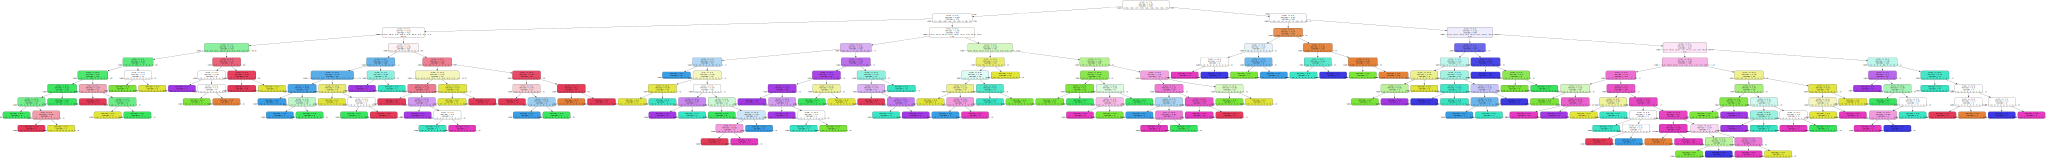

In [52]:

# Charger les données
# Chargement des données
Digit = datasets.load_digits()
X, y = Digit.data, Digit.target

# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Définir le modèle et les hyperparamètres à optimiser
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
}

# Optimiser avec GridSearchCV
grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Récupérer le meilleur modèle
best_tree = grid_search.best_estimator_

# Évaluer sur l'ensemble de test
y_pred = best_tree.predict(X_test)

print("Exactitude du meilleur arbre :", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Visualiser l'arbre optimisé
graph = export_graphviz(best_tree, rounded=True, proportion=False, precision=2, filled=True)
graph = Source(graph)
display(SVG(graph.pipe(format='svg')))


Exactitude du meilleur arbre : 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



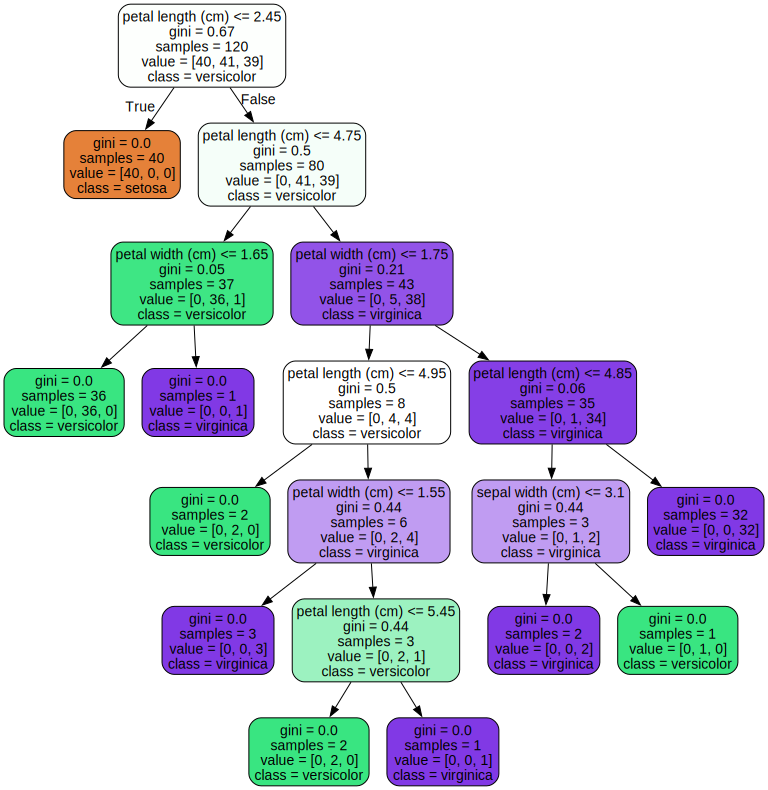

In [53]:

# Charger les données
data = load_iris()
X = data.data
y = data.target

# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Définir le modèle et les hyperparamètres à optimiser
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
}

# Optimiser avec GridSearchCV
grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Récupérer le meilleur modèle
best_tree = grid_search.best_estimator_

# Évaluer sur l'ensemble de test
y_pred = best_tree.predict(X_test)

print("Exactitude du meilleur arbre :", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Visualiser l'arbre optimisé
graph = export_graphviz(best_tree, rounded=True, proportion=False, precision=2, filled=True, class_names=data.target_names, feature_names=data.feature_names)
graph = Source(graph)
display(SVG(graph.pipe(format='svg')))


SVM

Fitting 5 folds for each of 18 candidates, totalling 90 fits
Meilleurs paramètres : {'C': 0.1, 'gamma': 0.01, 'kernel': 'linear'}
Meilleure précision en validation croisée : 0.8133333333333332

Exactitude sur l'ensemble de test : 0.8000

Rapport de classification :
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        29
  versicolor       0.68      0.65      0.67        23
   virginica       0.67      0.70      0.68        23

    accuracy                           0.80        75
   macro avg       0.78      0.78      0.78        75
weighted avg       0.80      0.80      0.80        75



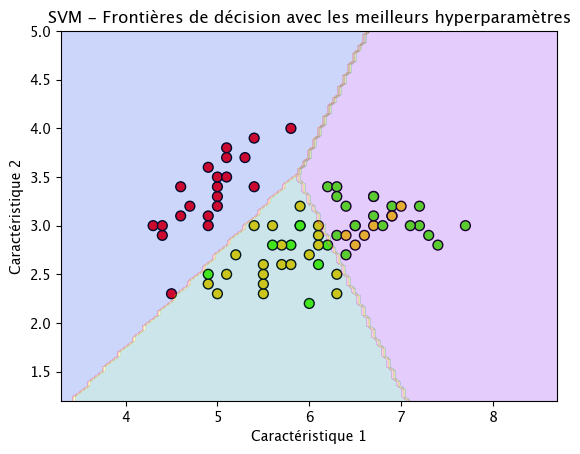

In [54]:


# Charger les données Iris
iris = datasets.load_iris()
X, y = iris.data[:, :2], iris.target  # Sélection des deux premières caractéristiques pour affichage

# Diviser les données en ensemble d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

# Définir la grille des hyperparamètres
param_grid = {
    'C': [0.1, 1, 10],
    'gamma': [0.01, 0.1, 1],
    'kernel': ['rbf', 'linear']  # Tester plusieurs noyaux
}

# Définir la validation croisée
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Configurer GridSearchCV
grid_search = GridSearchCV(SVC(), param_grid, cv=cv, scoring='accuracy', verbose=1)
grid_search.fit(X_train, y_train)

# Meilleurs paramètres trouvés
print("Meilleurs paramètres :", grid_search.best_params_)
print("Meilleure précision en validation croisée :", grid_search.best_score_)

# Évaluer le meilleur modèle sur l'ensemble de test
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Calculer les métriques
accuracy = accuracy_score(y_test, y_pred)
print(f"\nExactitude sur l'ensemble de test : {accuracy:.4f}")
print("\nRapport de classification :\n", classification_report(y_test, y_pred, target_names=iris.target_names))

# Afficher les frontières de décision
def affiche_fonction_de_decision(model, X, y):
    """Affiche les frontières de décision d'un modèle SVM dans un graphique 2D."""
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                         np.linspace(y_min, y_max, 100))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.2, cmap='prism')

# Visualiser les données et les frontières de décision
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, s=50, cmap='prism', edgecolor='k')
affiche_fonction_de_decision(best_model, X_train, y_train)
plt.xlabel('Caractéristique 1')
plt.ylabel('Caractéristique 2')
plt.title('SVM - Frontières de décision avec les meilleurs hyperparamètres')
plt.show()


Fitting 5 folds for each of 32 candidates, totalling 160 fits
Meilleurs paramètres : {'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}
Meilleure précision en validation croisée : 0.1525822470515208

Exactitude sur l'ensemble de test : 0.1491

Rapport de classification :
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        89
           1       0.12      0.99      0.21        91
           2       0.33      0.24      0.28        88
           3       0.31      0.23      0.26        92
           4       0.00      0.00      0.00        91
           5       0.67      0.02      0.04        91
           6       0.00      0.00      0.00        91
           7       0.00      0.00      0.00        89
           8       0.00      0.00      0.00        87
           9       0.00      0.00      0.00        90

    accuracy                           0.15       899
   macro avg       0.14      0.15      0.08       899
weighted avg       0.14      0.1

/Users/cyricedrivet/myenv-tf/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/cyricedrivet/myenv-tf/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/cyricedrivet/myenv-tf/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(resu

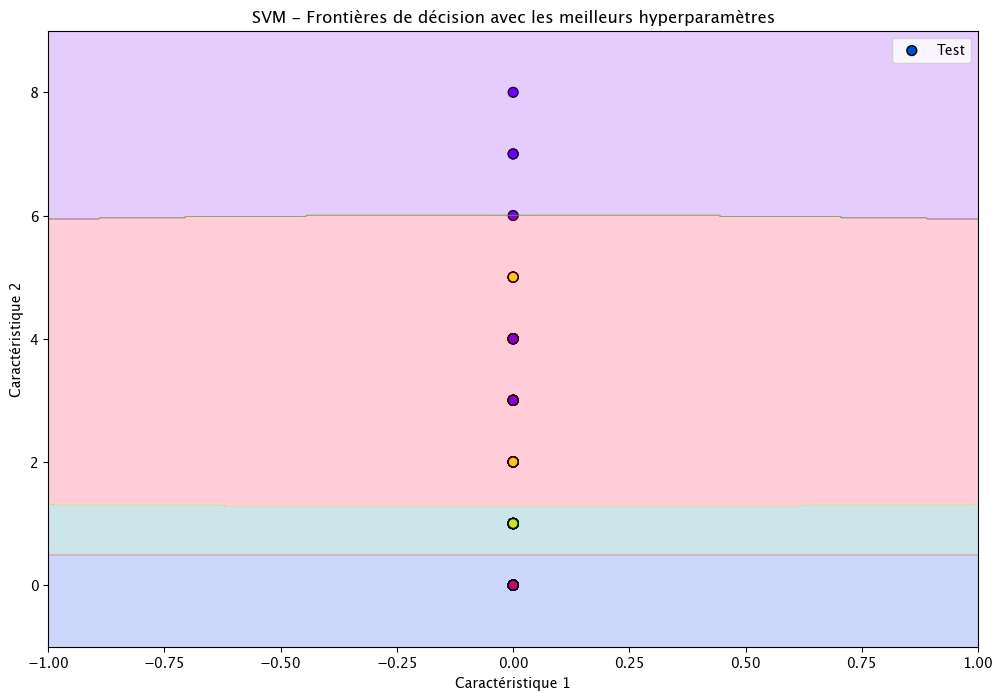

In [55]:


# Charger les données Digits
digits = datasets.load_digits()
X, y = digits.data[:, :2], digits.target  # Utiliser les deux premières caractéristiques pour la visualisation

# Diviser les données en ensemble d'entraînement et de test avec stratification
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.5, random_state=42, stratify=y
)
# Définir la grille des hyperparamètres
param_grid = {
    'C': [0.1, 1, 10, 100],          # Élargissement des valeurs de C
    'gamma': [0.001, 0.01, 0.1, 1],  # Élargissement des valeurs de gamma
    'kernel': ['rbf', 'linear']       # Tester plusieurs noyaux
}

# Définir la validation croisée
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Configurer GridSearchCV avec utilisation de tous les cores
grid_search = GridSearchCV(
    SVC(),
    param_grid,
    cv=cv,
    scoring='accuracy',
    verbose=1,
    n_jobs=-1  # Utiliser tous les cores disponibles
)
grid_search.fit(X_train, y_train)

# Meilleurs paramètres trouvés
print("Meilleurs paramètres :", grid_search.best_params_)
print("Meilleure précision en validation croisée :", grid_search.best_score_)

# Évaluer le meilleur modèle sur l'ensemble de test
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Calculer les métriques
accuracy = accuracy_score(y_test, y_pred)
print(f"\nExactitude sur l'ensemble de test : {accuracy:.4f}")
print("\nRapport de classification :\n", classification_report(y_test, y_pred))

# Fonction pour afficher les frontières de décision
def affiche_fonction_de_decision(model, X, y):
    """Affiche les frontières de décision d'un modèle SVM dans un graphique 2D."""
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(
        np.linspace(x_min, x_max, 500),  # Augmentation de la résolution
        np.linspace(y_min, y_max, 500)
    )
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.2, cmap='prism')

# Visualiser les données et les frontières de décision
plt.figure(figsize=(12, 8))
plt.scatter(
    X_test[:, 0], X_test[:, 1],
    c=y_test, s=50, cmap='prism', edgecolor='k', label='Test'
)
affiche_fonction_de_decision(best_model, X_test, y_test)
plt.xlabel('Caractéristique 1')
plt.ylabel('Caractéristique 2')
plt.title('SVM - Frontières de décision avec les meilleurs hyperparamètres')
plt.legend()
plt.show()
